In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from read_results import read_varnames
nvar = 74
varnames = read_varnames("saprc99_code/saprc99_Parameters.f90")[0:nvar]
print(varnames)

['H2SO4', 'HCOOH', 'CCO_OH', 'RCO_OH', 'CCO_OOH', 'RCO_OOH', 'XN', 'XC', 'SO2', 'O1D', 'ALK1', 'BACL', 'PAN', 'PAN2', 'PBZN', 'MA_PAN', 'H2O2', 'N2O5', 'HONO', 'ALK2', 'ALK3', 'TBU_O', 'ALK5', 'ARO2', 'HNO4', 'COOH', 'HOCOO', 'BZNO2_O', 'MEOH', 'ALK4', 'ARO1', 'DCB2', 'DCB3', 'CRES', 'DCB1', 'NPHE', 'ROOH', 'BALD', 'PHEN', 'CO', 'MGLY', 'ACET', 'HNO3', 'ETHENE', 'GLY', 'BZ_O', 'ISOPRENE', 'R2O2', 'TERP', 'METHACRO', 'OLE1', 'ISOPROD', 'OLE2', 'MVK', 'CCHO', 'HCHO', 'RNO3', 'O3P', 'RCHO', 'MEK', 'PROD2', 'O3', 'HO2', 'RO2_N', 'MA_RCO3', 'C_O2', 'BZCO_O2', 'RO2_R', 'NO', 'NO2', 'NO3', 'CCO_O2', 'RCO_O2', 'OH']


In [3]:
df_init = pd.Series(data=1e-8, index=varnames)
df_init.shape

(74,)

In [4]:
with open ("saprc99_code/saprc99_Initialize.f90", "r") as f:
    code_str = f.readlines()

for i, line in enumerate(code_str):
    if 'VAR(2)' in line:
        startline = i
    if 'FIX(1)' in line:
        endline = i-1
startline, endline

(59, 93)

In [5]:
CFACTOR = 2.447600e+13
for i in range(startline, endline):
    split = code_str[i].split()
    index = int(split[0][4:-1]) - 1 # Fortran -> Python
    valuestr = split[-1]
    # print(index, valuestr)
    df_init[index] = eval(valuestr)

In [6]:
df_init.head(10)

H2SO4      1.000000e-08
HCOOH      1.657025e+10
CCO_OH     2.839216e+10
RCO_OH     9.594592e+09
CCO_OOH    1.000000e-08
RCO_OOH    1.000000e-08
XN         1.000000e-08
XC         4.895200e+12
SO2        1.223800e+12
O1D        1.000000e-08
dtype: float64

# Run integrator

In [7]:
import saprc99_code.kpp4py as kpp

In [8]:
%time y_history = kpp.forward(df_init.values, 240)
y_history.shape

CPU times: user 105 ms, sys: 1.75 ms, total: 107 ms
Wall time: 109 ms


(75, 240)

In [9]:
df_history = pd.DataFrame(y_history.T, columns=varnames+['SUN'])
df_history.index.name = 'time'
df_history.head()

,H2SO4,HCOOH,CCO_OH,RCO_OH,CCO_OOH,RCO_OOH,XN,XC,SO2,O1D,...,C_O2,BZCO_O2,RO2_R,NO,NO2,NO3,CCO_O2,RCO_O2,OH,SUN
time,,,,,,,,,,,,,,,,,,,,,
0,2.131631e+10,1.941420e+10,2.994973e+10,1.275993e+10,8.695723e+05,4.160388e+05,5.950410e+07,4.906034e+12,1.202484e+12,0.072945,...,5.696964e+06,2.345523e+04,2.208117e+07,9.000156e+11,1.316153e+12,1.742790e+06,1.555662e+06,6.481562e+05,5.244521e+06,1.000000
1,4.417298e+10,2.437510e+10,3.207181e+10,1.710334e+10,9.292740e+06,4.451212e+06,2.741027e+09,4.931585e+12,1.179627e+12,0.216379,...,1.732457e+07,6.167814e+04,5.346038e+07,3.316187e+11,1.461165e+12,1.491187e+07,4.740948e+06,2.117670e+06,6.089295e+06,0.999220
2,7.278587e+10,2.982455e+10,3.286370e+10,1.871900e+10,7.719766e+07,3.730205e+07,2.363122e+10,5.010350e+12,1.151014e+12,0.391043,...,5.129260e+07,1.530285e+05,1.434036e+08,1.300213e+11,1.092018e+12,4.874537e+07,1.403130e+07,6.473448e+06,8.343999e+06,0.987575
3,1.097681e+11,3.544594e+10,3.363106e+10,1.944317e+10,7.498809e+08,3.586928e+08,7.330606e+10,5.171544e+12,1.114032e+12,0.550368,...,1.797156e+08,4.462390e+05,4.557147e+08,3.906664e+10,5.517341e+11,1.022524e+08,4.947643e+07,2.271533e+07,1.074183e+07,0.938153
4,1.434595e+11,4.025197e+10,3.919870e+10,2.214459e+10,6.370480e+09,2.971199e+09,1.141904e+11,5.302114e+12,1.080340e+12,0.574583,...,5.543973e+08,1.383080e+06,9.960480e+08,8.879201e+09,1.911030e+11,1.165292e+08,1.757165e+08,7.897251e+07,7.788335e+06,0.813302


/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


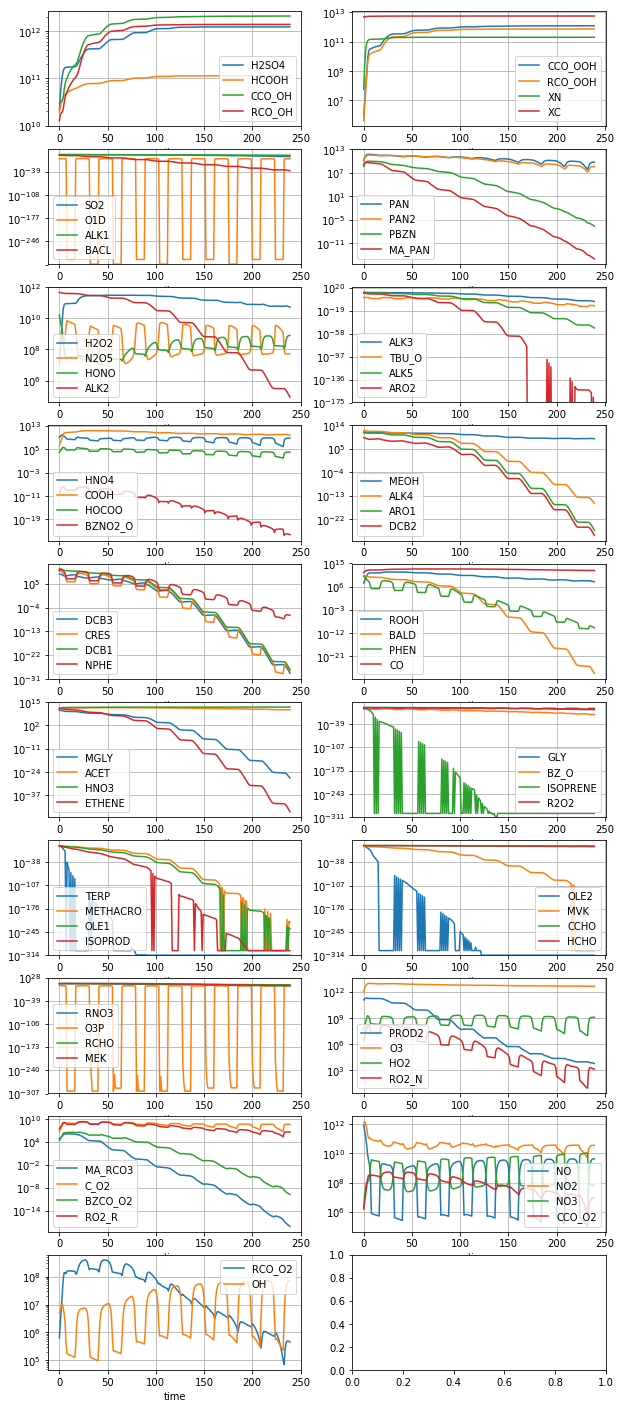

In [10]:
N_sub = 4
N_figures = 20

fig, axes = plt.subplots(N_figures//2, 2, figsize=[10, 25])

for i in range(N_figures-1):
    sub_name = varnames[i*N_sub:(i+1)*N_sub]
    df_history.plot(y=sub_name, logy=True, grid=True, ax=axes.ravel()[i])

# Write data range to file

In [11]:
df_range = df_history.drop('SUN', axis=1).agg(['min', 'max']).T
df_range.clip_lower(1e-8, inplace=True)
df_range.head(10)

,min,max
H2SO4,2.131631e+10,1.223799e+12
HCOOH,1.941420e+10,1.137429e+11
CCO_OH,2.994973e+10,2.073705e+12
RCO_OH,1.275993e+10,1.380322e+12
CCO_OOH,8.695723e+05,1.215977e+12
RCO_OOH,4.160388e+05,7.387218e+11
XN,5.950410e+07,2.010207e+11
XC,4.906034e+12,5.593960e+12
SO2,8.404868e+05,1.202484e+12
O1D,1.000000e-08,7.012137e-01


In [12]:
df_range.to_csv('saprc99_range.csv')

# One time step, different initial condition

In [13]:
df_history.values.shape

(240, 75)

In [14]:
y_rerun = kpp.onestep(df_history.values.T).T
y_rerun.shape

(240, 74)

In [15]:
df_rerun = pd.DataFrame(y_rerun, columns=varnames)
df_rerun.index.name = 'time'
df_rerun.head()

,H2SO4,HCOOH,CCO_OH,RCO_OH,CCO_OOH,RCO_OOH,XN,XC,SO2,O1D,...,MA_RCO3,C_O2,BZCO_O2,RO2_R,NO,NO2,NO3,CCO_O2,RCO_O2,OH
time,,,,,,,,,,,,,,,,,,,,,
0,4.419539e+10,2.437741e+10,3.207182e+10,1.710338e+10,9.309733e+06,4.459549e+06,2.743535e+09,4.931606e+12,1.179605e+12,0.216716,...,1.042843e+05,1.734615e+07,6.175115e+04,5.352187e+07,3.315424e+11,1.460849e+12,1.492319e+07,4.746957e+06,2.120521e+06,6.096173e+06
1,7.321728e+10,2.985384e+10,3.286291e+10,1.871508e+10,7.890102e+07,3.813619e+07,2.362628e+10,5.010506e+12,1.150583e+12,0.398423,...,1.611891e+05,5.218234e+07,1.554172e+05,1.457026e+08,1.297796e+11,1.085421e+12,4.882908e+07,1.427716e+07,6.589509e+06,8.488854e+06
2,1.121532e+11,3.557639e+10,3.369893e+10,1.946920e+10,8.317601e+08,3.976955e+08,7.266298e+10,5.170159e+12,1.111647e+12,0.591094,...,3.123325e+05,1.954605e+08,4.818604e+05,4.908507e+08,3.806058e+10,5.241257e+11,9.986467e+07,5.394717e+07,2.475570e+07,1.146431e+07
3,1.485836e+11,4.049394e+10,4.094333e+10,2.294601e+10,7.985310e+09,3.719001e+09,1.120002e+11,5.296562e+12,1.075216e+12,0.678743,...,8.637916e+05,6.687912e+08,1.690522e+06,1.139016e+09,8.128593e+09,1.585134e+11,9.492825e+07,2.181447e+08,9.803562e+07,8.676436e+06
4,1.688863e+11,4.395712e+10,6.479356e+10,3.405324e+10,2.526135e+10,1.172632e+10,1.298498e+11,5.355140e+12,1.054914e+12,0.612228,...,1.321165e+06,1.035167e+09,2.914290e+06,1.387823e+09,3.580050e+09,8.664025e+10,7.970209e+07,3.865346e+08,1.767147e+08,6.303054e+06


In [16]:
df_history.head()

,H2SO4,HCOOH,CCO_OH,RCO_OH,CCO_OOH,RCO_OOH,XN,XC,SO2,O1D,...,C_O2,BZCO_O2,RO2_R,NO,NO2,NO3,CCO_O2,RCO_O2,OH,SUN
time,,,,,,,,,,,,,,,,,,,,,
0,2.131631e+10,1.941420e+10,2.994973e+10,1.275993e+10,8.695723e+05,4.160388e+05,5.950410e+07,4.906034e+12,1.202484e+12,0.072945,...,5.696964e+06,2.345523e+04,2.208117e+07,9.000156e+11,1.316153e+12,1.742790e+06,1.555662e+06,6.481562e+05,5.244521e+06,1.000000
1,4.417298e+10,2.437510e+10,3.207181e+10,1.710334e+10,9.292740e+06,4.451212e+06,2.741027e+09,4.931585e+12,1.179627e+12,0.216379,...,1.732457e+07,6.167814e+04,5.346038e+07,3.316187e+11,1.461165e+12,1.491187e+07,4.740948e+06,2.117670e+06,6.089295e+06,0.999220
2,7.278587e+10,2.982455e+10,3.286370e+10,1.871900e+10,7.719766e+07,3.730205e+07,2.363122e+10,5.010350e+12,1.151014e+12,0.391043,...,5.129260e+07,1.530285e+05,1.434036e+08,1.300213e+11,1.092018e+12,4.874537e+07,1.403130e+07,6.473448e+06,8.343999e+06,0.987575
3,1.097681e+11,3.544594e+10,3.363106e+10,1.944317e+10,7.498809e+08,3.586928e+08,7.330606e+10,5.171544e+12,1.114032e+12,0.550368,...,1.797156e+08,4.462390e+05,4.557147e+08,3.906664e+10,5.517341e+11,1.022524e+08,4.947643e+07,2.271533e+07,1.074183e+07,0.938153
4,1.434595e+11,4.025197e+10,3.919870e+10,2.214459e+10,6.370480e+09,2.971199e+09,1.141904e+11,5.302114e+12,1.080340e+12,0.574583,...,5.543973e+08,1.383080e+06,9.960480e+08,8.879201e+09,1.911030e+11,1.165292e+08,1.757165e+08,7.897251e+07,7.788335e+06,0.813302


/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


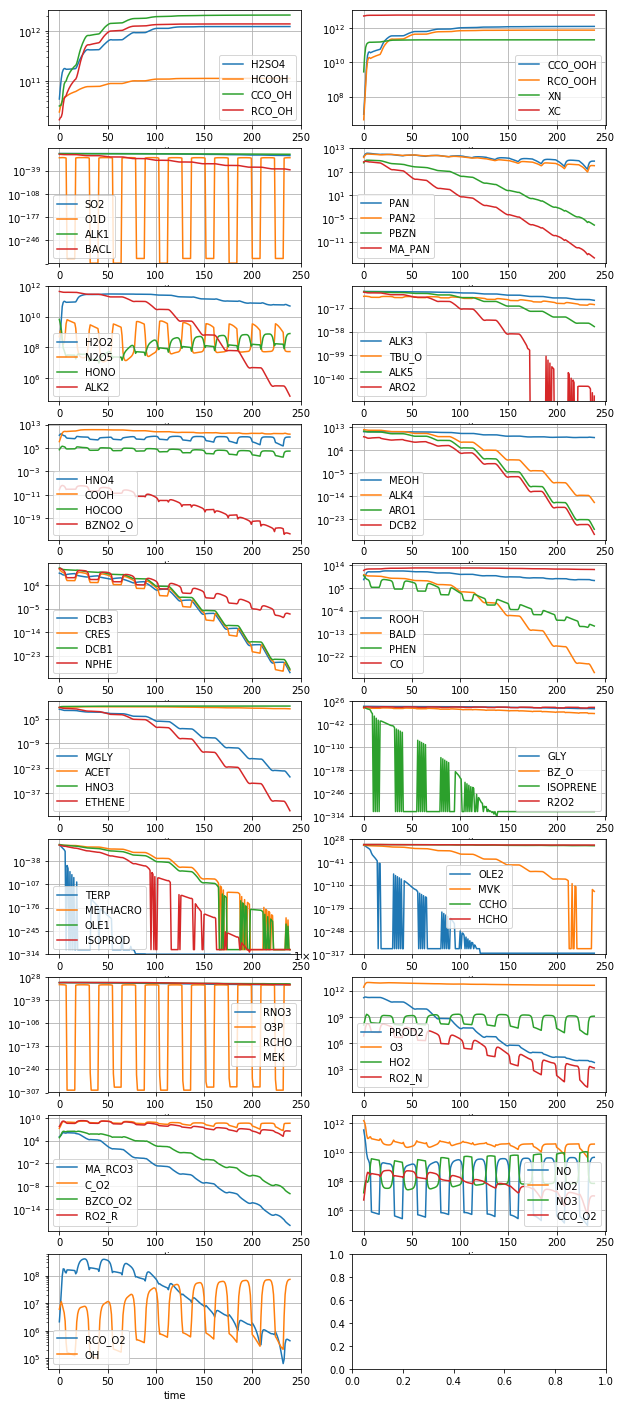

In [17]:
N_sub = 4
N_figures = 20

fig, axes = plt.subplots(N_figures//2, 2, figsize=[10, 25])

for i in range(N_figures-1):
    sub_name = varnames[i*N_sub:(i+1)*N_sub]
    df_rerun.plot(y=sub_name, logy=True, grid=True, ax=axes.ravel()[i])